In [18]:
import matplotlib.pyplot as plt
import random
from scipy.stats import gaussian_kde

import scipy.stats as stats
import numpy as np

In [20]:
data = [random.randint(1,10) for _ in range (1000)]

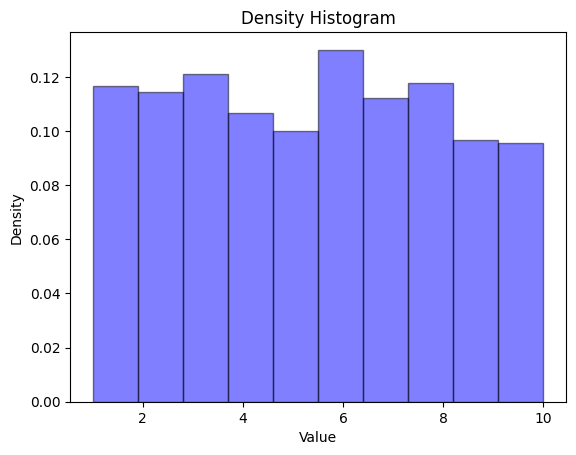

In [21]:

# Plotting the histogram
plt.hist(data, bins=10, density=True, alpha=0.5, color='blue', edgecolor='black')
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Density Histogram")
plt.show()


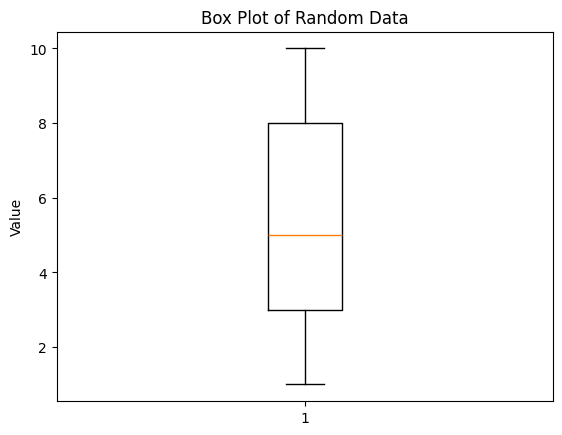

In [22]:
plt.boxplot(data)
plt.title("Box Plot of Random Data")
plt.ylabel("Value")
plt.show()


<h1> Explanation for  density histograms <h1>

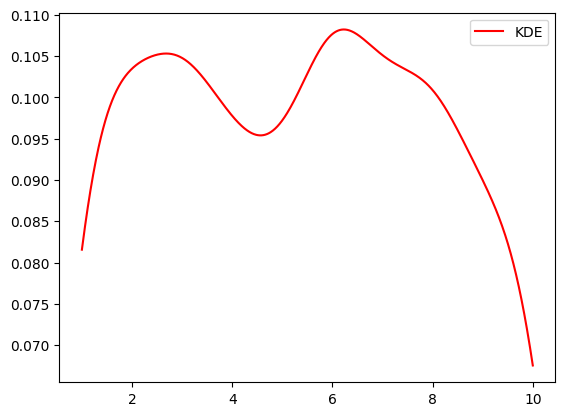

In [25]:
kde = gaussian_kde(data)
x = np.linspace(min(data), max(data), 1000)
plt.plot(x, kde(x), color='red', label='KDE')
plt.legend()

<h2> Explanation for kernel density <h2>

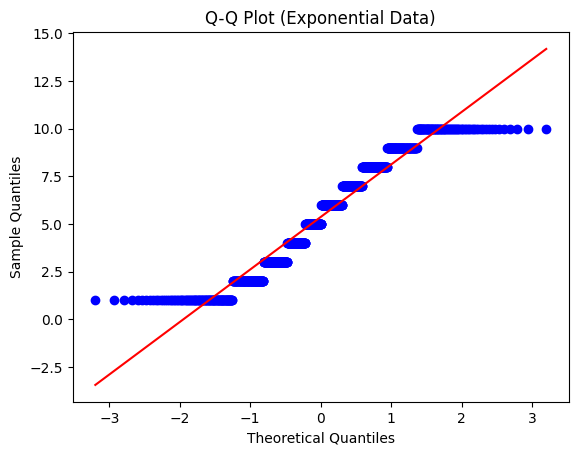

In [26]:
stats.probplot(data,dist="norm",plot=plt)
plt.title("Q-Q Plot (Exponential Data)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

The density of each bin in a density histogram is calculated by dividing the count of data points in that bin by the total number of data points and by the bin width. This ensures that the total area under the histogram is 1, making it easier to compare histograms of different sample sizes.

Here’s the formula for density in a bin:

$$
\text{Density of Bin} = \frac{\text{Count in Bin}}{\text{Total Data Points} \times \text{Bin Width}}
$$


### Step-by-Step Example

Let's break it down with a concrete example:

#### Suppose We Have the Following Data
Data: `[1, 2, 2, 3, 3, 3, 4, 4, 5]`

#### Step 1: Choose the Number of Bins
Let’s say we decide to have 3 bins.

#### Step 2: Calculate the Bin Width
1. Find the range of the data: \( \text{Range} = \text{max(data)} - \text{min(data)} = 5 - 1 = 4 \).
2. Bin width = Range / Number of bins = 4 / 3 ≈ 1.33.

This means our bins will be:
- **Bin 1:** 1 to 2.33
- **Bin 2:** 2.33 to 3.66
- **Bin 3:** 3.66 to 5

#### Step 3: Count Data Points in Each Bin
Count how many values fall into each bin:
- **Bin 1 (1 to 2.33):** 3 values (1, 2, 2)
- **Bin 2 (2.33 to 3.66):** 3 values (3, 3, 3)
- **Bin 3 (3.66 to 5):** 3 values (4, 4, 5)

#### Step 4: Calculate Density for Each Bin
The total number of data points is 9.

Using the density formula:

1. **Bin 1 (1 to 2.33):**
   $$
   \text{Density} = \frac{3}{9 \times 1.33} \approx 0.25
   $$

2. **Bin 2 (2.33 to 3.66):**
   $$
   \text{Density} = \frac{3}{9 \times 1.33} \approx 0.25
   $$

3. **Bin 3 (3.66 to 5):**
   $$
   \text{Density} = \frac{3}{9 \times 1.33} \approx 0.25
   $$

### Why Density?
By dividing by the bin width, the height of each bar in a density histogram reflects the **relative frequency per unit** rather than the absolute count, which normalizes the histogram. This makes the sum of the areas of all bins equal to 1, effectively turning the histogram into a representation of a probability distribution.

# Kernel Density Estimation (KDE)

Kernel Density Estimation (KDE) is a way to estimate the probability density function of a random variable based on a sample of data points. Let's break down the concept in a very simple example.

## Intuition
Think of KDE as placing a small "bump" (kernel) at each data point, then adding up these bumps to get a smooth curve that represents the density.

## Mathematical Description
Given a set of data points \( x_1, x_2, \ldots, x_n \), the kernel density estimator at a point \( x \) is given by:

$$
\hat{f}(x) = \frac{1}{n h} \sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right)
$$


where:
- \( \hat{f}(x) \) is the estimated density at point \( x \),
- \( n \) is the number of data points,
- \( h \) is a parameter called the **bandwidth**, which controls the "width" of each bump,
- \( K \) is the **kernel function**, which determines the shape of each bump.

## Step-by-Step Example

Let’s go through a simple example with three data points: \( x_1 = 2 \), \( x_2 = 5 \), and \( x_3 = 7 \), and we'll use a Gaussian (normal) kernel for simplicity.

### 1. Choose a Kernel Function
The Gaussian kernel is a common choice, defined as:
$$
K(u) = \frac{1}{\sqrt{2 \pi}} e^{-\frac{u^2}{2}}
$$


This kernel places a bell-shaped curve centered at each data point.

### 2. Choose a Bandwidth \( h \)
Let's choose \( h = 1.5 \). This bandwidth determines how wide each bell-shaped curve (kernel) is.

### 3. Compute the Density at a Point \( x \)
Let's say we want to estimate the density at \( x = 4 \). Using the KDE formula, we have:

$$
\hat{f}(4) = \frac{1}{3 \cdot 1.5} \left( K\left(\frac{4 - 2}{1.5}\right) + K\left(\frac{4 - 5}{1.5}\right) + K\left(\frac{4 - 7}{1.5}\right) \right)
$$


1. **Calculate each term inside the kernel function:**
   - For \( x_1 = 2 \): 
     $$ 
     \frac{4 - 2}{1.5} = \frac{2}{1.5} \approx 1.33 
     $$
   - For \( x_2 = 5 \): 
     $$ 
     \frac{4 - 5}{1.5} = \frac{-1}{1.5} \approx -0.67 
     $$
   - For \( x_3 = 7 \): 
     $$ 
     \frac{4 - 7}{1.5} = \frac{-3}{1.5} \approx -2.0 
     $$

2. **Apply the Gaussian kernel to each value:**
   - For \( u = 1.33 \): 
     $$ 
     K(1.33) \approx 0.244 
     $$
   - For \( u = -0.67 \): 
     $$ 
     K(-0.67) \approx 0.319 
     $$
   - For \( u = -2.0 \): 
     $$ 
     K(-2.0) \approx 0.054 
     $$

3. **Add them up and scale:**
$$
\hat{f}(4) = \frac{1}{4.5} (0.244 + 0.319 + 0.054) \approx \frac{1}{4.5} \times 0.617 \approx 0.137
$$


So, the estimated density at \( x = 4 \) is approximately \( 0.137 \).

## Summary

In this example, we:
1. Chose a kernel (Gaussian),
2. Chose a bandwidth (\( h \)),
3. Applied the kernel to each data point to create "bumps,"
4. Added up the contributions from each data point to estimate the density at \( x = 4 \).

KDE smooths out the density estimation by combining these "bumps" from all data points, resulting in a smooth curve that represents the distribution of the data.